In [2]:
from bing_image_downloader import downloader

In [3]:
downloader.download('red apple with white background', limit = 30, output_dir = 'images', adult_filter_off = True)

[%] Downloading Images to D:\Data_Science\PROJECTS\Apple_Tomato_\images\red apple with white background


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.olivethebest.ca/wp-content/uploads/2018/12/Red-Apple.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/ee/85/82/ee85820a36ee6a7c0c220bfbc9845075.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://image.freepik.com/free-photo/red-apples-isolated-white-background_299651-65.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.publicdomainpictures.net/pictures/70000/velka/red-apple-white-background.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn2.vectorstock.com/i/1000x1000/61/86/red-apple-on-white-background-vector-7336186.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://photo.elsoar.com/wp-content/images/Red-apple-on-a-white-background.jpg
[!] Issue getting: http://photo.elsoar.com/wp

In [4]:
downloader.download('tomato with white background', limit = 30, output_dir = 'images', adult_filter_off = True)

[%] Downloading Images to D:\Data_Science\PROJECTS\Apple_Tomato_\images\tomato with white background


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-3AlJ5psx-9Y/UFlJRVBevzI/AAAAAAAABFE/M8k43so8MnM/s1600/49.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://geeglenews.com/wp-content/uploads/2017/03/background-tomato-383281.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.freeimages.com/images/large-previews/855/tomato-on-a-white-background-1633175.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media.istockphoto.com/photos/tomato-isolated-on-white-background-picture-id466175630?k=6&amp;m=466175630&amp;s=612x612&amp;w=0&amp;h=fu_mQBjGJZIliOWwCR0Vf2myRvKWyQDsymxEIi8tZ38=
[%] File Downloaded !

[%] Downloading Image #5 from http://www.freestockphotos.biz/pictures/17/17058/A+whole+red+tomato+isolated+on+a+white+background.jpg
[%] File Downloaded !

[%] Downloading Image #

In [48]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [68]:
target = []
images = []
flat_data = []

data_dir = "D:/Data_Science/PROJECTS/Apple_Tomato_/images"
cat = ['tomato with white background', 'red apple with white background']

for category in cat:
    class_num = cat.index(category)
    path  = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        #print(img_array.shape )
        #plt.imshow(img_array )
        img_resize = resize(img_array, (150, 150, 3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [69]:
flat_data[13]

array([1., 1., 1., ..., 1., 1., 1.])

In [70]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

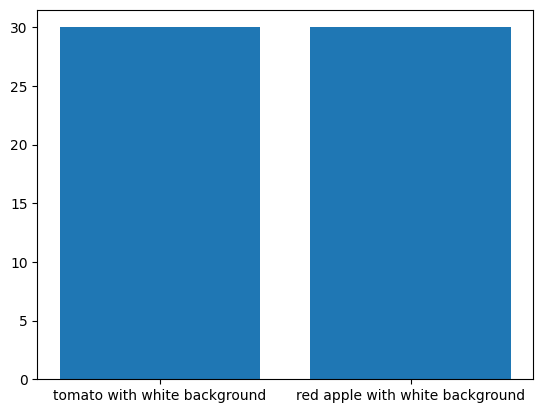

In [71]:
unique, count = np.unique(target, return_counts = True)
plt.bar(cat, count)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(flat_data, target , test_size = 0.3, random_state = 42)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C' :[1, 10, 100, 1000], 'kernel': ['linear']},
    {'C' :[1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
svc = svm.SVC(probability  =True)
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [74]:
y_pred = clf.predict(X_test)

In [75]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [76]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
accuracy_score(y_pred, y_test)

0.8333333333333334

In [79]:
confusion_matrix(y_pred, y_test)

array([[6, 1],
       [2, 9]], dtype=int64)

In [80]:
import pickle

In [81]:
pickle.dump(clf,open('img_model.p', 'wb') )

In [82]:
model  =pickle.load(open('img_model.p', 'rb'))

(189, 162, 3)
predicted_output : red apple with white background


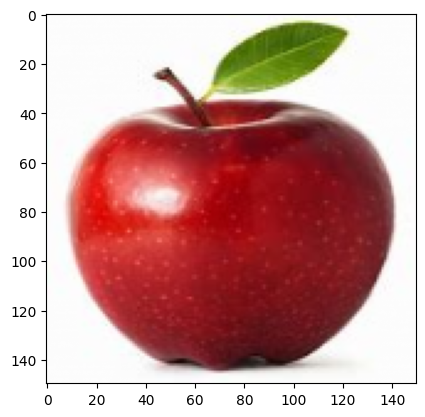

In [83]:
flat_data = []
img = imread('download.jpeg')
img_resize = resize(img, (150, 150, 3))
flat_data.append(img_resize.flatten())
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = cat[y_out[0]]
print(f"predicted_output : {y_out}")

(180, 165, 3)
predicted_output : tomato with white background


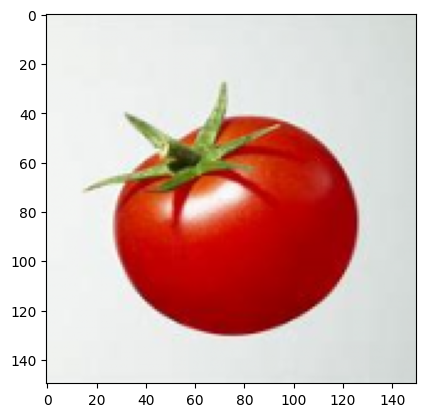

In [84]:
flat_data = []
img = imread('download (1).jpeg')
img_resize = resize(img, (150, 150, 3))
flat_data.append(img_resize.flatten())
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = cat[y_out[0]]
print(f"predicted_output : {y_out}")